<a href="https://colab.research.google.com/github/GuillermoAlmandoz/IEBS-Master-Data-Science/blob/main/Proyecto_M4_NaiveBayes_Bebes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/GuillermoAlmandoz/IEBS-Master-Data-Science/main/notebook_banner.png" width="1024" style="float:center">
<div style="margin-top:10px; display:flex; align-items:center;">
    <div style="float:left; margin-right:10px;vertical-align:middle">
        <a href="https://www.linkedin.com/in/Guillermo-Almandoz-Rios/" targer="_blank">
            <img src="https://raw.githubusercontent.com/GuillermoAlmandoz/IEBS-Master-Data-Science/main/lkin-logo.png"/>
        </a>
    </div>
    <div> 
        Guillermo Almándoz (23/01/2023)
    </div>
 </div>

 # Ajuste Algoritmo supervisado SVM (Support Vector Machine) y Naive Bayes

Ajustar un modelo binario utilizando modelos Naive Bayes y Support Vector Machine (SVM) y, además, se va a  evaluar y comparar modelos binarios de clasificación mediante diferentes métricas de validación tales como la curva ROC y el área bajo la curva.

Las complicaciones en el parto son una de las principales causas de mortalidad perinatal. El cardiotocógrafo fetal (CTG) se puede utilizar como una herramienta de seguimiento durante el parto ya que puede permitir evaluar el estado de salud del bebé durante el nacimiento.

La cardiotocografía registra simultáneamente la frecuencia cardíaca fetal, los movimientos fetales y las contracciones uterinas. El registro permite al profesional sanitario valorar el latido cardíaco fetal durante la última etapa de la gestación y la respuesta del bebé a las contracciones durante todo el parto hasta el nacimiento.

En este sentido, se recogieron datos de 2.126 cardiotocogramas fetales (CTG) y se midieron las características de diagnóstico respectivas. Los CTG también fueron clasificados por tres obstetras expertos y se asignó una etiqueta de clasificación de consenso a cada uno de ellos. De esta manera las características de diagnóstico representan el conjunto de variables explicativas que va a permitir estimar el estado fetal (target) en normal o anormal. 

Tanto en los sprints como en el proyecto, debes esforzarte en ajustar el mejor algoritmo posible. Una vez obtenido el algoritmo, debes entregar un documento de un máximo de 3 folios que contenga los siguientes apartados:

Análisis descriptivo de las variables explicativas y el target.
Detalle de la división del conjunto de datos en los conjuntos de entrenamiento y test.
Algoritmo seleccionado junto con los hiperparámetros escogidos en la modelización.
Curva ROC, Área Bajo la Curva, matriz de confusión y precisión del algoritmo para los conjuntos de entrenamiento y test.

In [ ]:

##############
# SVM LINEAL #
##############

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Preprocesado, modelado y validacion 
# ==============================================================================
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Gráficos
# ==============================================================================
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as xp

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap']="bwr"
plt.rcParams['savefig.bbox']="tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 2 - CARGA DEL FICHERO DE DATOS
file = '/content/data/ASI_casoPractico.csv'
data = pd.read_csv(file, sep = ';')
data.head()

,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


## Análisis descriptivo de las variables explicativas y el target.

In [ ]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [ ]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [ ]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [ ]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

LBE         0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
Target      0
dtype: int64

In [ ]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERION
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LBE,2126.0,133.303857,9.840844,106.0,126.0,133.0,140.0,160.0
AC,2126.0,2.722484,3.560850,0.0,0.0,1.0,4.0,26.0
FM,2126.0,7.241298,37.125309,0.0,0.0,0.0,2.0,564.0
UC,2126.0,3.659925,2.847094,0.0,1.0,3.0,5.0,23.0
ASTV,2126.0,46.990122,17.192814,12.0,32.0,49.0,61.0,87.0
MSTV,2126.0,1.332785,0.883241,0.2,0.7,1.2,1.7,7.0
ALTV,2126.0,9.846660,18.396880,0.0,0.0,0.0,11.0,91.0
MLTV,2126.0,8.187629,5.628247,0.0,4.6,7.4,10.8,50.7
DL,2126.0,1.570085,2.499229,0.0,0.0,0.0,3.0,16.0
DS,2126.0,0.003293,0.057300,0.0,0.0,0.0,0.0,1.0


0    1655
1     471
Name: Target, dtype: int64


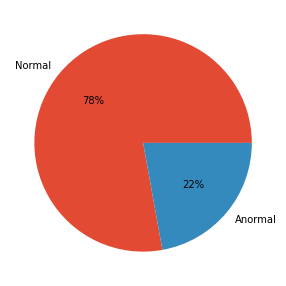

In [ ]:
# 3 - DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

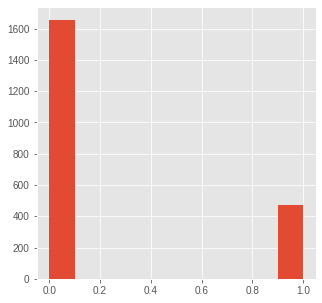

In [ ]:
# 3 - HISTOGRAMA
fig, ax = plt.subplots(1,1,figsize=(5,5)) 
plt.style.use("seaborn")
data['Target'].hist(ax=ax);

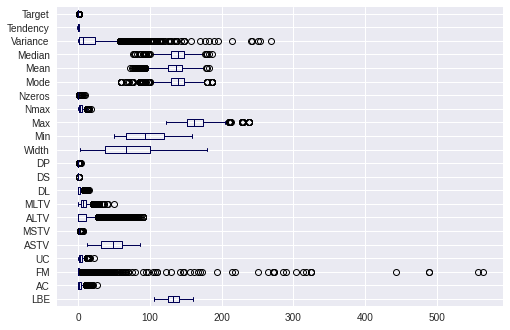

In [ ]:
# BOX PLOT
data_box_plot = data.boxplot(vert=False, color = "#000054")

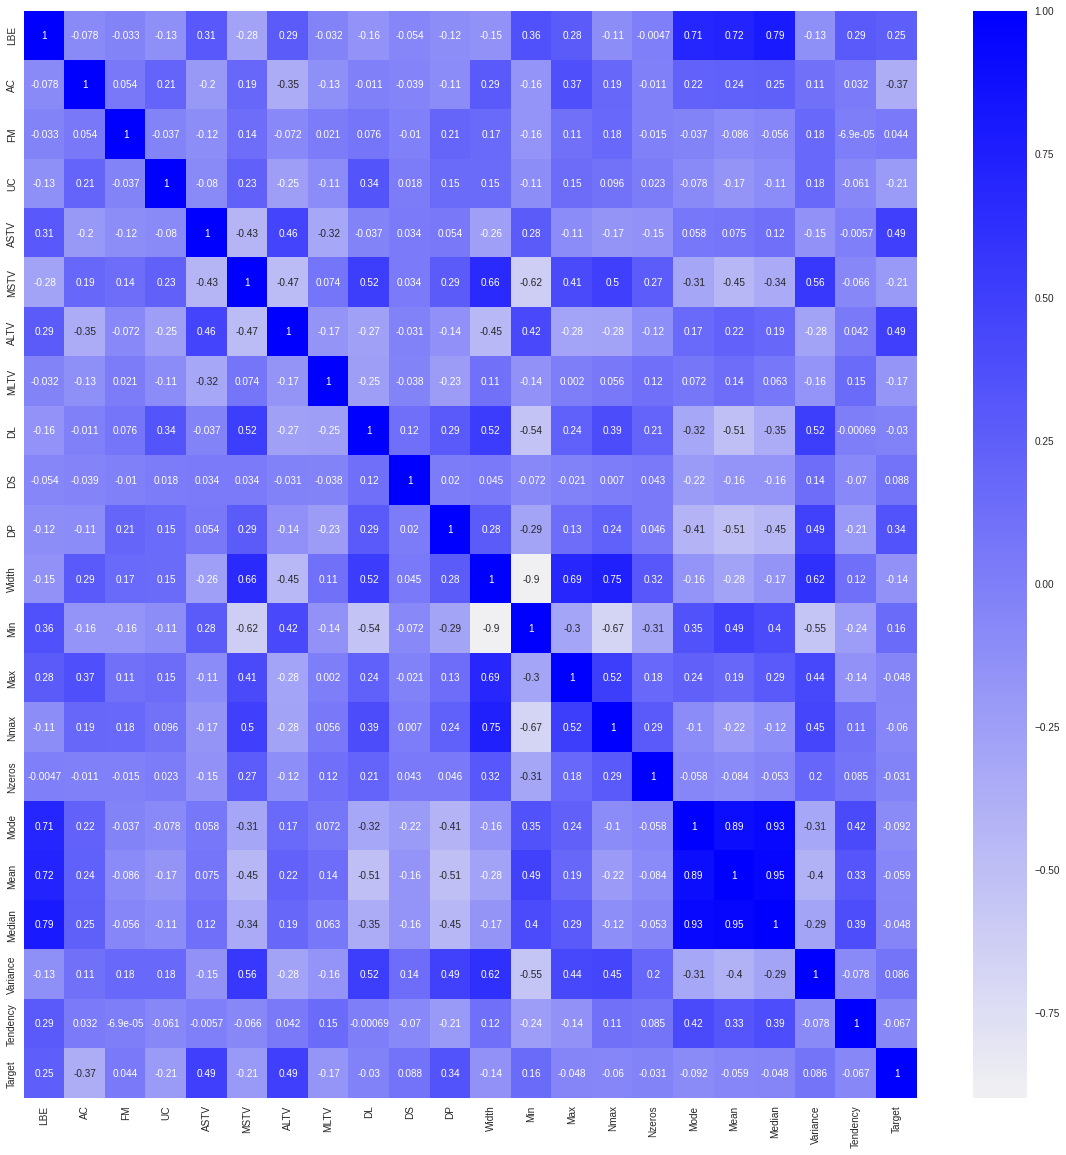

In [ ]:
# CLASE 2

# 3 - MATRIZ DE CORRELACIONES
plt.figure(figsize=(20,20))
corr = data.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)


Las variables que presentan mayor correlación con el target son:
- ASTV (0,49)
- ALTV (0,49)
- AC (-0.37)

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

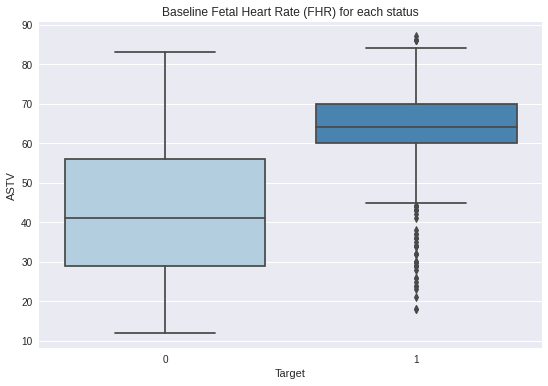

In [ ]:
# 3 - RELACION UNIVARIANTE DEL TARGET CON LAS VARIABLES EXPLICATIVAS
plt.figure(figsize = (9,6))
sns.boxplot(x = 'Target', y= 'ASTV', data = data, palette="Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

La variable ASTV (Percentage of time with abnormal short-term variability) determina entre un estado normal del bebé y un estado anormal del bebé, ya que observamos como los valores del estado normal del Q3 están por debajo del estado anormal del Q1

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

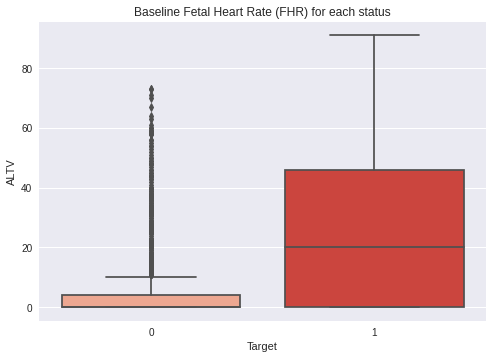

In [ ]:
sns.boxplot(x = 'Target', y= 'ALTV', data = data, palette="Reds")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

La variable ASTV (Percentage of time with abnormal long-term variability) determina la diferencia entre un estado normal del bebé y un estado anormal del bebé, ya que observamos como los valores del estado normal son próximos a 0 (menos de 5), mientras que en el estado anormal, la mediana está en 20

Text(0.5, 1.0, 'Baseline Fetal Heart Rate (FHR) for each status')

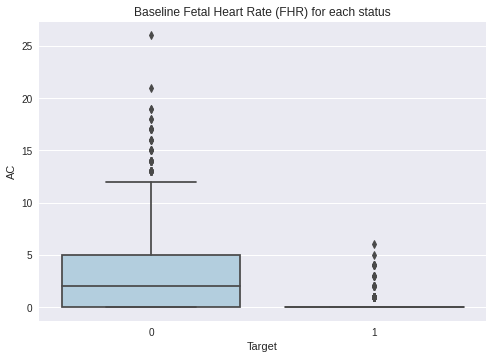

In [ ]:
sns.boxplot(x = 'Target', y= 'AC', data = data, palette="Blues")
plt.title('Baseline Fetal Heart Rate (FHR) for each status')

La variable AC (Number of accelerations per seconds)  determina la diferencia entre un estado normal del bebé y un estado anormal del bebé, ya que observamos que en el estado anormal del bebé no presenta valores (salvo algunos outliers), mientras que en el estado normal, la mediana está alrededor de 2.

### Eliminación de outliers de las variables numéricas

In [ ]:
# identificamos variables numericas y variables categoricas
num_var=data.select_dtypes(include=np.number).columns.to_list()
cat_var=data.select_dtypes(include=object).columns.to_list()

In [ ]:
num_var

['LBE',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'Target']

In [ ]:
cat_var

[]

In [ ]:
#hacemos una copia del dataset para mantener el original
data1=data.copy()

In [ ]:
# eliminamos outlier
def outlier_tret(x):
    upper=x.quantile(0.98)
    lower=x.quantile(0.2)
    x=np.where(x>upper,upper,x)
    x=np.where(x<lower,lower,x)
    return x

In [ ]:
data1[num_var]=data1[num_var].apply(lambda x: outlier_tret(x))

## Detalle de la división del conjunto de datos en los conjuntos de entrenamiento y test.

In [ ]:
# MUESTREO
# ENTRENAMIENTO Y TEST

X = data1.loc[:, data.columns != "Target"]
y = data1.loc[:, data.columns == "Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

## Algoritmo seleccionado junto con los hiperparámetros escogidos en la modelización

In [ ]:
# SVM Lineal
svmLineal = svm.SVC(C = 10 #REGUARIZACION
                    ,kernel='linear'
                    ,degree = 1 # Poly, grado del polimnomio
                    ,probability = True) # Sirve para calcular la curva ROC

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_predicciones_train_svm = svmLineal.predict_proba(X_train)
y_proba_predicciones_test_svm = svmLineal.predict_proba(X_test)

## Curva ROC y Área Bajo la Curva para los conjuntos de entrenamiento y test. 

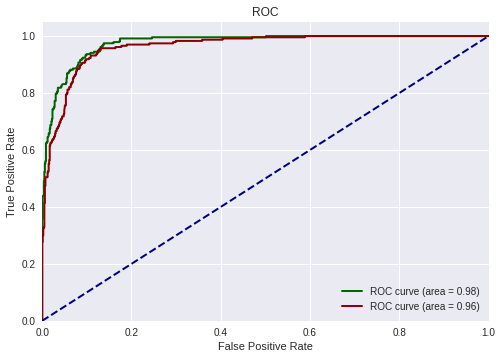

In [ ]:
# # VALIDACION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA TRAINING
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_predicciones_train_svm[:, 1]) # fpr: false positive rate
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# CURVA ROC Y AUC PARA TEST
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_predicciones_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

Tal como se puede observar en el Anexo de pruebas, el mejor algoritmo encontrado es a través del SVM  con kernel Lineal, con parámetro C (Regularización)= 10,( minimizando los errores de clasificación frente al margen ), con un auc de la curva del ROC de test de 0,97 (según la función Grid, aunque en el gráfico de arriba pone 0,96). Eliminando los outliers, mejora el área de la curva ROC.

## Anexo Realización de pruebas para encontrar el mejor algoritmo

### A partir del conjunto de entrenamiento ajuste un modelo a partir del algoritmo de Naive Bayes.

In [ ]:
# MODELIZACION
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

modelNB = gnb.fit(X_train, y_train.values.ravel())
y_pred_train = modelNB.predict_proba(X_train) 
y_pred_test = modelNB.predict_proba(X_test)

In [ ]:
print(y_pred_train)

[[2.52759865e-03 9.97472401e-01]
 [9.69390506e-01 3.06094940e-02]
 [1.00000000e+00 9.65863159e-11]
 ...
 [1.11134286e-02 9.88886571e-01]
 [1.00000000e+00 5.19842508e-18]
 [9.99999997e-01 2.83522693e-09]]


### Obtenga la curva ROC y el área bajo la curva para los conjuntos de entrenamiento y test con el algoritmo Naive Bayes

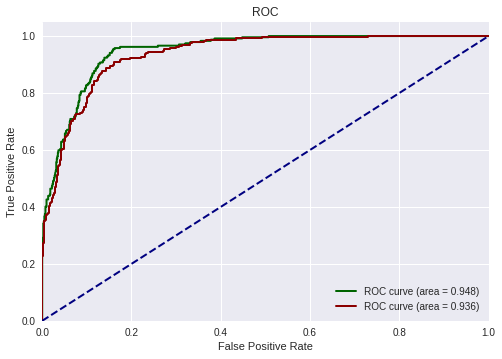

In [ ]:
# # VALIDACION
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# CURVA ROC Y AUC PARA TRAINING
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train[:, 1]) # fpr: false positive rate
roc_auc_train = auc(fpr_train, tpr_train)

# CURVA ROC Y AUC PARA TEST
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)


# GRAFICA
plt.figure()
lw = 2

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve (area = %0.3f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve (area = %0.3f)" % roc_auc_test,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()


### SVM lineal 

In [ ]:
# SVM Lineal
svmLineal = svm.SVC(C = 1 #REGUARIZACION
                    ,kernel='linear'
                    ,degree = 1 # Poly, grado del polimnomio
                    ,probability = True) # Sirve para calcular la curva ROC

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_predicciones_train_svm = svmLineal.predict_proba(X_train)
y_proba_predicciones_test_svm = svmLineal.predict_proba(X_test)

In [ ]:
print(y_proba_predicciones_train_svm)

[[1.88113656e-01 8.11886344e-01]
 [7.76603384e-01 2.23396616e-01]
 [9.98916266e-01 1.08373357e-03]
 ...
 [9.30720961e-02 9.06927904e-01]
 [9.99081376e-01 9.18623706e-04]
 [9.95790127e-01 4.20987302e-03]]


In [ ]:
# CURVA ROC Y AUC PARA TRAINING
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_predicciones_train_svm[:, 1]) # fpr: false positive rate
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# CURVA ROC Y AUC PARA TEST
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_predicciones_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

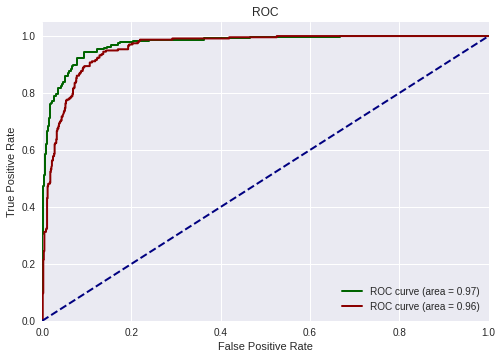

In [ ]:
# CURVA ROC Y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

El modelo SVM lineal sin eliminar ouliers es muy bueno, ya que la curva ROC de 0.96 en test significa que ajusta muy bien los datos. Además no hay apenas discrepancias con la curva ROC de entrenamiento, solo hay una diferencia de 0,01 lo que indica que no hay apenas sobreajuste.

### Comparación en la misma gráfica, la curva ROC y el AUC para el conjunto de test clasificado con Naive Bayes y con SVM

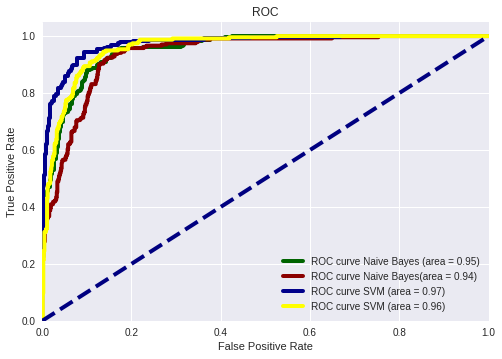

In [ ]:
# GRAFICA
plt.figure()
lw = 4

plt.plot(fpr_train,tpr_train,color="darkgreen",lw=lw,label="ROC curve Naive Bayes (area = %0.2f)" % roc_auc_train,)
plt.plot(fpr_test,tpr_test,color="darkred",lw=lw,label="ROC curve Naive Bayes(area = %0.2f)" % roc_auc_test,)
plt.plot(fpr_train_svm,tpr_train_svm,color="darkblue",lw=lw,label="ROC curve SVM (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="yellow",lw=lw,label="ROC curve SVM (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

### SVM Ajuste polinómico

In [ ]:
# SVM Lineal
svmLineal = svm.SVC(C = 1 #REGUARIZACION
                    ,kernel='poly'
                    ,degree = 2 # Poly, grado del polimnomio
                    ,probability = True) # Sirve para calcular la curva ROC

# Ajuste del modelo
svmLineal.fit(X_train, y_train)

# VALIDACION CON EL CONJUNTO DE TEST 
y_proba_predicciones_train_svm = svmLineal.predict_proba(X_train)
y_proba_predicciones_test_svm = svmLineal.predict_proba(X_test)

In [ ]:
# CURVA ROC Y AUC PARA TRAINING
fpr_train_svm, tpr_train_svm, _ = roc_curve(y_train, y_proba_predicciones_train_svm[:, 1]) # fpr: false positive rate
roc_auc_train_svm = auc(fpr_train_svm, tpr_train_svm)

# CURVA ROC Y AUC PARA TEST
fpr_test_svm, tpr_test_svm, _ = roc_curve(y_test, y_proba_predicciones_test_svm[:, 1])
roc_auc_test_svm = auc(fpr_test_svm, tpr_test_svm)

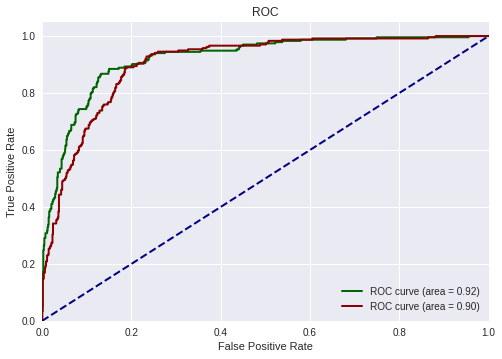

In [ ]:
# CURVA ROC Y AUC
plt.figure()
lw = 2

plt.plot(fpr_train_svm,tpr_train_svm,color="darkgreen",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_train_svm,)
plt.plot(fpr_test_svm,tpr_test_svm,color="darkred",lw=lw,label="ROC curve (area = %0.2f)" % roc_auc_test_svm,)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend(loc="lower right")
plt.show()

En este caso empeoramos tanto la Curva ROC del entrenamiento como la Curva ROC del test, al definir un kernel polinómico de grado 2. Si ampliamos a grado3, mejoraríamos la Curva ROC de entrenamiento pero no de test, con lo que indica ue estaríamos sobreajustando el modelo.

Las variables tienen gran capacidad predictiva del target. La curva ROC de Naive Bayesdel 0.93 y un sobreajuste de 0.02 es una buena medida. En este caso comparamos con la curva ROC de SVM con ajuste polinómico de grado 2, que es el último gráfico realizado.
En este caso si eliminamos los outliers nos da un Área de la curva ROC con más sobreajuste SA=0.04)
El algoritmo con la búsqueda de la mejor combinación de hiperparámetros, lo realizamos con la función GridSearch

### GridSearch
Búsqueda para la mejor combinación de parámetros

In [ ]:
from sklearn.model_selection import GridSearchCV
 
# Hiperparametros
param_grid = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1,1,10]},
    {"kernel": ["linear"], "C": [0.1,1,10]},
    {"kernel": ["poly"], "C": [0.1,1,10], "degree": [2,3]},
]
 
grid = GridSearchCV(
        estimator  = SVC(),
        param_grid = param_grid, 
        scoring    = 'roc_auc', # roc_auc, accuracy
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_C,param_gamma,param_kernel,param_degree,mean_test_score,std_test_score,mean_train_score,std_train_score
7,1,NaN,linear,NaN,0.966010,0.010922,0.974789,0.005989
8,10,NaN,linear,NaN,0.965467,0.011974,0.975013,0.005278
6,0.1,NaN,linear,NaN,0.962871,0.011482,0.971213,0.006195
5,10,0.0001,rbf,NaN,0.954516,0.008169,0.974440,0.005273
4,10,0.001,rbf,NaN,0.950585,0.007096,0.999443,0.000100
2,1,0.001,rbf,NaN,0.947848,0.007956,0.986843,0.003252
3,1,0.0001,rbf,NaN,0.939509,0.005151,0.949476,0.005118
14,10,NaN,poly,3,0.935434,0.009163,0.945121,0.007261
0,0.1,0.001,rbf,NaN,0.934853,0.004276,0.960407,0.005244
13,10,NaN,poly,2,0.930360,0.008925,0.936467,0.005452


Sin elminar los outliers, el mejor ajuste en terminos de conjuntos de entrenamiento y test sería el SVM con kernel Lineal, con parámetro C (Regularización)= 0,1,( maximizando el margen frente a los errores de clasificación), con un auc de la  curva del ROC de test de 0,96 con un sobreajuste de 0,00644. No hay apenas diferencias entre los parámetros Ccon los kernel lineales.
Sin embargo con los kernel gaussianos, se obtiene un peor auc de la curva ROC y un mayor sobreajuste 0,02.
Fianalmente los kernel polinómicos son los siguientes, siendo el ajuste con el grado 3 mejor que con el grado 2.


Eliminando los outliers, el mejor ajuste en terminos de conjuntos de entrenamiento y test sería el SVM con kernel Lineal, con parámetro C (Regularización)= 10,( minimizando los errores de clasificación frente al margen ), con un auc de la curva del ROC de test de 0,97 con un sobreajuste de 0,0057. No hay apenas diferencias entre los parámetros Ccon los kernel lineales. Sin embargo con los kernel gaussianos, se obtiene un peor auc de la curva ROC y un mayor sobreajuste 0,02. Fianalmente los kernel polinómicos son los siguientes, siendo el ajuste con el grado 3 mejor que con el grado 2.